## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

C:\Users\mzkan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

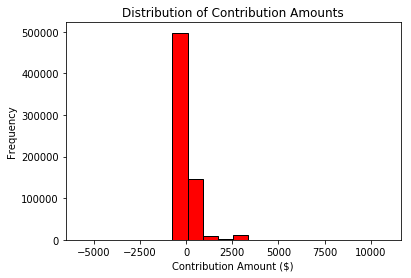

In [3]:
# 1a YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'], bins=20, color='red', edgecolor='black')

plt.title('Distribution of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')

plt.show()

- **1a answer here:** -1250 to 625 dollars have the highest frequency

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

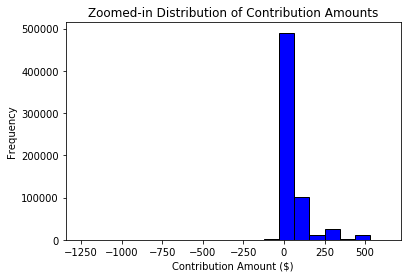

In [4]:
# 1b YOUR CODE HERE
contrib_zoomed = contrib[(contrib['contb_receipt_amt'] >= -1250) & 
                         (contrib['contb_receipt_amt'] <= 625)]

# Plot zoomed-in histogram
plt.hist(contrib_zoomed['contb_receipt_amt'], bins=20, color='blue', edgecolor='black')

plt.title('Zoomed-in Distribution of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')

plt.show()

- **1b answer here:** That its more like between -60 to 100. When we zoom in, we are able to get a more precise range

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

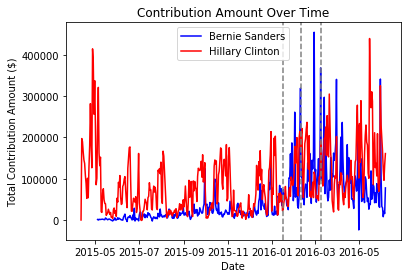

In [5]:
# 1c YOUR CODE HERE
bernie_contrib = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
hillary_contrib = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

bernie_daily_total = bernie_contrib.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
hillary_daily_total = hillary_contrib.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

# Plotting time-series line chart
plt.plot(bernie_daily_total.index, bernie_daily_total.values, label='Bernie Sanders', color='blue')
plt.plot(hillary_daily_total.index, hillary_daily_total.values, label='Hillary Clinton', color='red')

debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
for date in debate_dates:
    plt.axvline(x=datetime.strptime(date, '%Y-%m-%d'), linestyle='--', color='gray')

plt.title('Contribution Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount ($)')

plt.legend()

plt.show()

- **1c answer here:** On an average note, fundraising increased after debates, except for Bernie after the 3rd debate decreased a bit

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [6]:
# 2a YOUR CODE HERE
donations_per_candidate = contrib.groupby('cand_nm').size().reset_index(name='num_donations')
donations_per_candidate_sorted = donations_per_candidate.sort_values(by='num_donations', ascending=False)

donations_per_candidate_sorted.head()

,cand_nm,num_donations
18,"Sanders, Bernard",379284
3,"Clinton, Hillary Rodham",171104
4,"Cruz, Rafael Edward 'Ted'",56355
1,"Carson, Benjamin S.",27015
17,"Rubio, Marco",13267


- **2a answer here:** Sanders, Bernard received the most number of contributions

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [7]:
# 2b YOUR CODE HERE
contrib_california = contrib[contrib['contbr_st'] == 'CA']
sum_donations_per_candidate = contrib_california.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index(name='sum_donations')
sum_donations_per_candidate_sorted = sum_donations_per_candidate.sort_values(by='sum_donations', ascending=False)

sum_donations_per_candidate_sorted.head()

,cand_nm,sum_donations
3,"Clinton, Hillary Rodham","38,969,122.68"
18,"Sanders, Bernard","19,062,998.80"
4,"Cruz, Rafael Edward 'Ted'","5,926,568.27"
17,"Rubio, Marco","4,998,700.92"
0,"Bush, Jeb","3,316,836.83"


- **2b answer here:** Clinton, Hillary Rodham raised the most money in California

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [8]:
# 2c YOUR CODE HERE
sum_donations_per_candidate_sorted.rename(columns={'cand_nm': 'Candidate', 'sum_donations': 'Total_Donation_Value'}, inplace=True)
donations_per_candidate_sorted.rename(columns={'cand_nm': 'Candidate', 'num_donations': 'Number_of_Donations'}, inplace=True)

# Merge the two tables based on candidate names
merged_table = pd.merge(sum_donations_per_candidate_sorted, donations_per_candidate_sorted, on='Candidate')
merged_table.head()

,Candidate,Total_Donation_Value,Number_of_Donations
0,"Clinton, Hillary Rodham","38,969,122.68",171104
1,"Sanders, Bernard","19,062,998.80",379284
2,"Cruz, Rafael Edward 'Ted'","5,926,568.27",56355
3,"Rubio, Marco","4,998,700.92",13267
4,"Bush, Jeb","3,316,836.83",3056


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [9]:
# 2d YOUR CODE HERE
merged_table['Average_Donation'] = merged_table['Total_Donation_Value'] / merged_table['Number_of_Donations']

merged_table_sorted = merged_table.sort_values(by='Average_Donation', ascending=False)
merged_table_sorted.head()

,Candidate,Total_Donation_Value,Number_of_Donations,Average_Donation
23,"Gilmore, James S III","8,100.00",3,"2,700.00"
15,"Perry, James R. (Rick)","208,400.00",104,"2,003.85"
20,"Pataki, George E.","30,450.00",20,"1,522.50"
11,"Christie, Christopher J.","456,066.00",333,"1,369.57"
12,"Graham, Lindsey O.","379,495.00",305,"1,244.25"


- **2d answer here:** Gilmore, James S III had the highest average donation

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

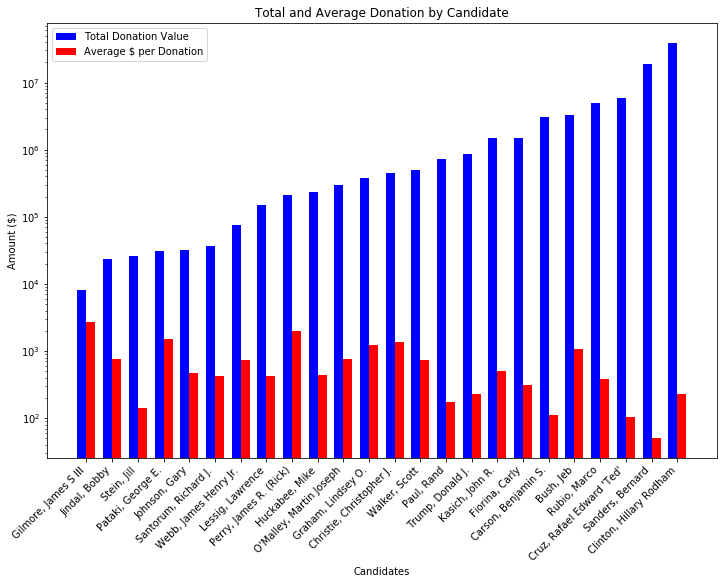

In [10]:
# 2e YOUR CODE HERE
merged_table_sorted = merged_table_sorted.sort_values(by='Total_Donation_Value', ascending=True)

plt.figure(figsize=(12, 8))
ax = plt.subplot()

# Set the positions for the bars
total_donation_pos = range(len(merged_table_sorted))
average_donation_pos = [pos + 0.35 for pos in total_donation_pos]

# Plot bars for total donation value
ax.bar(total_donation_pos, merged_table_sorted['Total_Donation_Value'], width=0.35, color='blue', label='Total Donation Value')

# Plot bars for average donation value
ax.bar(average_donation_pos, merged_table_sorted['Average_Donation'], width=0.35, color='red', label='Average $ per Donation')

# Set x-axis tick positions and labels
ax.set_xticks([pos + 0.35 / 2 for pos in total_donation_pos])
ax.set_xticklabels(merged_table_sorted['Candidate'], rotation=45, ha='right')

plt.title('Total and Average Donation by Candidate')
plt.xlabel('Candidates')
plt.ylabel('Amount ($)')

plt.yscale('log')

plt.legend()

plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** I see that the candidates with the highest contributions were not reliant on high contributions but more contributers. Here we can conclude that a small contribution can go a long way instead of a few large contributions

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [20]:
# 3a YOUR CODE HERE
donations_per_occupation = hillary_contrib.groupby('contbr_occupation').size().reset_index(name='num_donations')
donations_per_occupation_sorted = donations_per_occupation.sort_values(by='num_donations', ascending=False)

donations_per_occupation_sorted.head()

,contbr_occupation,num_donations
5278,RETIRED,35767
475,ATTORNEY,7514
3180,INFORMATION REQUESTED,4991
6272,TEACHER,3848
3046,HOMEMAKER,3522


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [35]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    df_occupation = df.groupby('contbr_occupation').size().reset_index(name='num_donations')
    df_sorted = df_occupation.sort_values(by='num_donations', ascending=False)

    return df_sorted.head()

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [37]:
# 3c YOUR CODE HERE
hillary_contrib = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
sanders_contrib = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
trump_contrib = contrib[contrib['cand_nm'] == 'Trump, Donald J.']

get_donors(hillary_contrib)

,contbr_occupation,num_donations
5278,RETIRED,35767
475,ATTORNEY,7514
3180,INFORMATION REQUESTED,4991
6272,TEACHER,3848
3046,HOMEMAKER,3522


In [38]:
get_donors(sanders_contrib)

,contbr_occupation,num_donations
5106,NOT EMPLOYED,98217
6493,RETIRED,15352
7748,TEACHER,10390
7192,SOFTWARE ENGINEER,7957
2565,ENGINEER,7237


In [39]:
get_donors(trump_contrib)

,contbr_occupation,num_donations
603,RETIRED,1719
335,INFORMATION REQUESTED,88
104,CEO,62
616,SALES,58
469,OWNER,57


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [41]:
# 3d YOUR CODE HERE
donors_by_candidate = contrib.groupby('cand_nm').apply(get_donors)

donors_by_candidate

contbr_occupation  \
cand_nm                                                                  
Bush, Jeb                 356                                  RETIRED   
                          189                                HOMEMAKER   
                          22                                  ATTORNEY   
                          320                                     Q.A.   
                          283                                PRESIDENT   
Carson, Benjamin S.       1011                                 RETIRED   
                          543   INFORMATION REQUESTED PER BEST EFFORTS   
                          520                                HOMEMAKER   
                          826                                PHYSICIAN   
                          936                                     R.N.   
Christie, Christopher J.  93                                   RETIRED   
                          70                                      NONE   
                          26                                CONSULTANT   
                          17                                       CEO   
                          46                                 HOMEMAKER   
Clinton, Hillary Rodham   5278                                 RETIRED   
                          475                                 ATTORNEY   
                          3180                   INFORMATION REQUESTED   
                          6272                                 TEACHER   
                          3046                               HOMEMAKER   
Cruz, Rafael Edward 'Ted' 1866                                 RETIRED   
                          1032  INFORMATION REQUESTED PER BEST EFFORTS   
                          955                                HOMEMAKER   
                          700                                 ENGINEER   
                          2172                                 TEACHER   
Fiorina, Carly            407                                  RETIRED   
                          205                                HOMEMAKER   
                          32                                  ATTORNEY   
                          212   INFORMATION REQUESTED PER BEST EFFORTS   
                          233                                 INVESTOR   
Gilmore, James S III      0                                        COB   
                          1                          FINANCIAL ADVISOR   
                          2                      INVESTMENT MANAGEMENT   
Graham, Lindsey O.        57                                   RETIRED   
                          31    INFORMATION REQUESTED PER BEST EFFORTS   
                          44                               P/T ADJUNCT   
                          26                                 EXECUTIVE   
                          29                                 HOMEMAKER   
Huckabee, Mike            93                                   RETIRED   
                          90                REQUESTED PER BEST EFFORTS   
                          42                                 HOMEMAKER   
                          68                                     OWNER   
                          41                          FUNERAL DIRECTOR   
Jindal, Bobby             15                                   RETIRED   
                          6                                   ENGINEER   
                          13                                 PROFESSOR   
                          14                                   REALTOR   
                          12                                 PRESIDENT   
Johnson, Gary             24                                   RETIRED   
                          28             TWICE REQUESTED, NOT RECEIVED   
                          26                         SOFTWARE ENGINEER   
                          10                     ELECTRONIC TECHNICIAN   
                          15                       HOTEL 

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** In analyzing the donation data across candidates, several insights emerge. It's notable that many donors across candidates share the occupation of being retired, suggesting a common demographic trend among contributors. An intriguing observation is the presence of donors with the occupation listed as "president," indicating a potential endorsement. Furthermore, it's interesting to observe that a significant portion of Bernie Sanders' donors are not employed, highlighting the support from individuals who may not be currently working. These findings shed light on the diverse demographics and occupational backgrounds of donors across different political campaigns

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** The insights from section 3 highlight common occupational trends among donors, such as retirees and a notable presence of donors listing their occupation as "president." Additionally, Bernie Sanders' significant support from unemployed individuals is noteworthy. In section 2, we observed that candidates with the highest contributions relied more on a larger number of contributors rather than high individual donations, emphasizing the importance of grassroots support. The average retiring age is 63 which could indicate that capturing more baby boomers could help increase your campaign contributions

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k